In [24]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Mall_Customers.csv')

data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [25]:
data1 = data.drop(['Gender'],axis=1)
data2 = data1.drop(['Age'],axis=1)

data2

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40
...,...,...,...
195,196,120,79
196,197,126,28
197,198,126,74
198,199,137,18


# Scaling 

In [26]:
# using robust scaling because it uses median and quartiles and ignores the point which are very different from the rest

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_data = scaler.fit_transform(data2)



In [27]:
print(scaled_data)

[[-1.         -1.2739726  -0.2875817 ]
 [-0.98994975 -1.2739726   0.81045752]
 [-0.9798995  -1.24657534 -1.1503268 ]
 [-0.96984925 -1.24657534  0.70588235]
 [-0.95979899 -1.21917808 -0.26143791]
 [-0.94974874 -1.21917808  0.67973856]
 [-0.93969849 -1.19178082 -1.1503268 ]
 [-0.92964824 -1.19178082  1.1503268 ]
 [-0.91959799 -1.16438356 -1.22875817]
 [-0.90954774 -1.16438356  0.5751634 ]
 [-0.89949749 -1.16438356 -0.94117647]
 [-0.88944724 -1.16438356  1.28104575]
 [-0.87939698 -1.1369863  -0.91503268]
 [-0.86934673 -1.1369863   0.70588235]
 [-0.85929648 -1.1369863  -0.96732026]
 [-0.84924623 -1.1369863   0.75816993]
 [-0.83919598 -1.10958904 -0.39215686]
 [-0.82914573 -1.10958904  0.41830065]
 [-0.81909548 -1.05479452 -0.54901961]
 [-0.80904523 -1.05479452  1.25490196]
 [-0.79899497 -1.02739726 -0.39215686]
 [-0.78894472 -1.02739726  0.60130719]
 [-0.77889447 -1.         -1.17647059]
 [-0.76884422 -1.          0.60130719]
 [-0.75879397 -0.91780822 -0.94117647]
 [-0.74874372 -0.91780822

# K Means clustering

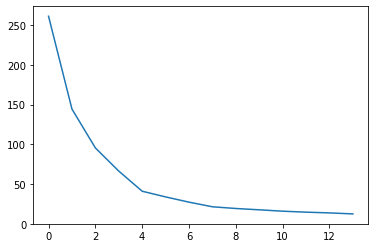

In [32]:
from sklearn.cluster import KMeans

cost_values=[]

for i in range(1,15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_data)
    cost_values.append(kmeans.inertia_)
    
plt.plot(cost_values)


In [33]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(scaled_data)

clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [34]:
data['clusters'] = clusters

data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,1
197,198,Male,32,126,74,1
198,199,Male,32,137,18,1


In [35]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),clusters
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,0.510000
std,57.879185,13.969007,26.264721,25.823522,0.501154
min,1.000000,18.000000,15.000000,1.000000,0.000000
25%,50.750000,28.750000,41.500000,34.750000,0.000000
50%,100.500000,36.000000,61.500000,50.000000,1.000000
75%,150.250000,49.000000,78.000000,73.000000,1.000000
max,200.000000,70.000000,137.000000,99.000000,1.000000
